In [1]:
import tensorflow as tf
import numpy as np

## 13.1 고성능 머신 러닝 라이브러리 텐서플로

### 13.1.1 텐서플로란?

텐서플로는 머신 러닝 알고리즘을 구현하고 실행하기 위한 프로그래밍 인터페이스로서 확장이 용이하고 다양한 플랫폼을 지원합니다.

### 13.1.2 텐서플로 학습 방법

저수준 API를 배운 후 고수준 API 인 tf.keras를 살펴보겟습니다.

### 13.1.3 텐서플로 시작

텐서플로 1.X 에서는 계산 그래프가 구성된 후 텐서플로의 Session을 통해 그래프에 있는 각 노드를 실행합니다.
텐서플로 2.X 버전에서 이과 관련된 연산은 tensorflow.compat.v1 모듈 아래로 이동되었습니다.


In [2]:
#### 텐서플로 1 버젼 코드

## 그래프를 생성합니다.

g = tf.Graph()
with g.as_default():
    x = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')

    z = w * x + b

    init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session(graph=g) as sess:
    ## w와 b를 초기화 합니다
    sess.run(init)
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'%(t, sess.run(z, feed_dict={x:t})))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [3]:
### 텐서플로 2버전 코드

w = tf.Variable(2.0, name='weight')
b = tf.Variable(0.7, name='bias')

for x in [1.0, 0.6, -1.8]:
    z = w * x + b
    print('x=%4.1f --> z=%4.1f'%(x, z))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [4]:
### 13.1.4 배열 구조 다루기

x_array = np.arange(18).reshape(3,2,3)
x2 = tf.reshape(x_array, shape=(-1, 6))

## 각 열의 합을 계산합니다
xsum = tf.reduce_sum(x2, axis=0)

## 각 열의 평균을 계산합니다
xmean = tf.reduce_mean(x2, axis=0)

print('입력 크기', x_array.shape)
print('크기가 변경된 입력:\n', x2.numpy())
print('열의 합:\n', xsum.numpy())
print('열의 평균:\n', xmean.numpy())

입력 크기 (3, 2, 3)
크기가 변경된 입력:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
열의 합:
 [18 21 24 27 30 33]
열의 평균:
 [ 6  7  8  9 10 11]


위 예제에선 tf.reshape, tf.reduce_sum, tf.reduce_mean 세 개의 함수를 사용했습니다.  
reshape 의 첫 번째 차원으로 -1을 사용했는데, 그러면 텐서 전체 크기와 남은 차원에 따라 해당 차원이 계산됩니다.  
예를 들어 tf.reshape(tensor, shape=(-1,)) 은 일렬로 텐서를 펼칩니다.

tf.reduce_sum과 tf.reduce_mean은 각각 텐서의 합과 평균을 계산합니다.

In [5]:
### 13.1.5 텐서플로 저수준 API로 간단한 모델 개발

# 텐서플로를 이용해 최소 제곱법 회귀를 구현해보겠습니다.

X_train = np.arange(10).reshape((10, 1))
y_train = np.array([
    1.0, 1.3, 3.1,
    2.0, 5.0, 6.3,
    6.6, 7.4, 8.0,
    9.0
])

In [6]:
class TfLinreg(object):
    
    def __init__(self, learning_rate=0.01):
        ## 가중치와 절편을 정의합니다
        self.w = tf.Variable(tf.zeros(shape=(1)))
        self.b = tf.Variable(tf.zeros(shape=(1)))
        ## 경사 하강법 옵티마이저를 설정합니다
        self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)

    def fit(self, X, y, num_epochs=10):
    ## 비용 함수의 값을 저장하기 위한 리스트를 정의합니다
        training_costs = []
        for step in range(num_epochs):
        ## 자동 미분을 위해 연산 과정을 기록합니다.
            with tf.GradientTape() as tape:
                z_net = self.w * X + self.b
                z_net = tf.reshape(z_net, [-1])
                sqr_errors = tf.square(y - z_net)
                mean_cost = tf.reduce_mean(sqr_errors)

            grads = tape.gradient(mean_cost, [self.w, self.b])
            self.optimizer.apply_gradients(zip(grads, [self.w, self.b]))
            training_costs.append(mean_cost.numpy())
        return training_costs

    def predict(self, X):
        return self.w * X + self.b

In [7]:
lrmodel = TfLinreg()

In [8]:
training_costs = lrmodel.fit(X_train, y_train)

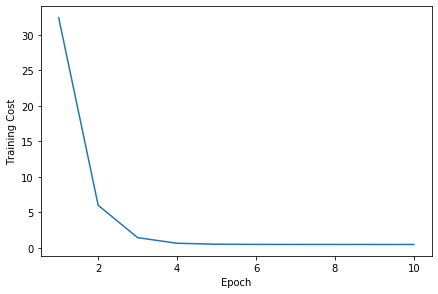

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

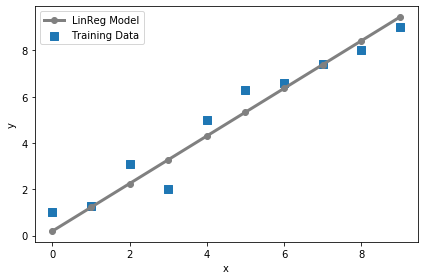

In [10]:
plt.scatter(X_train, y_train, marker='s', s=50, label='Training Data')
plt.plot(range(X_train.shape[0]), lrmodel.predict(X_train), color='gray', marker='o', markersize=6, linewidth=3, label='LinReg Model')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

## 13.2 tf.keras API로 다중 신경망 훈련

### 13.2.1 훈련 데이터 준비

mnist 데이터셋을 사용합니다.

In [11]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack(">II", lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols =struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2

    return images, labels

In [12]:
X_train, y_train = load_mnist('mnist/', kind='train')
print('행: %d, 열: %d' %(X_train.shape[0], X_train.shape[1]))

행: 60000, 열: 784


In [13]:
X_test, y_test = load_mnist('mnist/', kind='t10k')
print('행: %d, 열: %d' %(X_test.shape[0], X_test.shape[1]))

행: 10000, 열: 784


In [14]:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [15]:
np.random.seed(123)

In [16]:
# 훈련 데이터를 준비하기 위한 원-핫 인코딩 사용 tf.keras 사용

y_train_onehot = tf.keras.utils.to_categorical(y_train)
print("처음 3개 레이블: ", y_train[:3])
print("처음 3개 레이블 (원-핫):\n ", y_train_onehot[:3])

처음 3개 레이블:  [5 0 4]
처음 3개 레이블 (원-핫):
  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [17]:
### 13.2.2 피드포워드 신경망 구성

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=50, input_dim=X_train_centered.shape[1], kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='tanh'))
model.add(tf.keras.layers.Dense(units=50, input_dim=50, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='tanh'))
model.add(tf.keras.layers.Dense(units=y_train_onehot.shape[1], input_dim=50, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [19]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

In [20]:
history = model.fit(X_train_centered, y_train_onehot, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 53us/sample - loss: 0.6980 - val_loss: 0.3523
Epoch 2/50
54000/54000 [==============================] - 2s 39us/sample - loss: 0.3645 - val_loss: 0.2710
Epoch 3/50
54000/54000 [==============================] - 2s 38us/sample - loss: 0.3023 - val_loss: 0.2349
Epoch 4/50
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2672 - val_loss: 0.2111
Epoch 5/50
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2424 - val_loss: 0.1950
Epoch 6/50
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2231 - val_loss: 0.1833
Epoch 7/50
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2073 - val_loss: 0.1725
Epoch 8/50
54000/54000 [==============================] - 2s 36us/sample - loss: 0.1938 - val_loss: 0.1647
Epoch 9/50
54000/54000 [==============================] - 2s 36us/sample - loss: 0.1822 - val_l

In [21]:
y_train_pred = model.predict_classes(X_train_centered, verbose=0)
print('처음 3개 예측: ', y_train_pred[:3])

처음 3개 예측:  [5 0 4]


In [24]:
y_train_pred = model.predict_classes(X_train_centered, verbose=0)
currect_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = currect_preds / y_train.shape[0]

print('처음 3개 예측: ', y_train_pred[:3])
print('훈련 정확도: %.2f%%' % (train_acc * 100))

y_test_pred = model.predict_classes(X_test_centered, verbose=0)
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]
print('테스트 정확도: %.2f%%' % (test_acc * 100))


처음 3개 예측:  [5 0 4]
훈련 정확도: 98.97%
테스트 정확도: 96.28%


In [25]:
## 13.3 다층 신경망의 활성화 함수 선택

### 13.3.1 로지스틱 함수 요약
# 로지스틱은 시그모이드 함수의 특별한 형태입니다.
# 로지스틱 함수를 구현해봅시다.

X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [28]:
# 여러 개의 로지스틱 활성화 유닛으로 구성된 출력층은 의미있게 해석할 만한 확률값을 만들지 못함

W = np.array([
    [1.1, 1.2, 0.8, 0.4],
    [0.2, 0.4, 1.0, 0.2],
    [0.6, 1.5, 1.2, 0.7]
])

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('최종 입력: \n', Z)
print('출력 유닛: \n', y_probas)

y_class = np.argmax(Z, axis=0)
print('예측 클래스 레이블: %d' % y_class)

최종 입력: 
 [1.78 0.76 1.65]
출력 유닛: 
 [0.85569687 0.68135373 0.83889105]
예측 클래스 레이블: 0


In [29]:
### 13.3.2 소프트맥스 함수를 사용하여 다중 클래스 확률 예측
# 소프트맥스를 사용하면 클래스 확률의 합이 1이 됩니다

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('확률: \n', y_probas)
np.sum(y_probas)

확률: 
 [0.44668973 0.16107406 0.39223621]


1.0

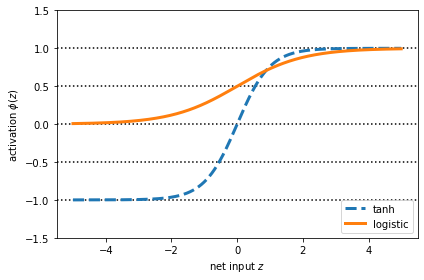

In [30]:
### 13.3.3 하이퍼볼릭 탄젠트로 출력 범위 넓히기
# 하이퍼볼릭 탄젠트 함수의 장점은 출력 범위를 (-1, 1) 사이로 넓혀서 역전파 알고리즘의 수렴을 향상시킬 수 있는 것입니다.

import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act, linewidth=3, linestyle='--', label='tanh')
plt.plot(z, log_act, linewidth=3, label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [31]:
### 13.3.4 렐루 활성화 함수
# 하이퍼볼릭 탄젠트와 로지스칙 활성화 함수엔 그래디언트 소실 문제가 있습니다.
# 최종 입력에 대한 활성화 함수의 도함수가 z가 커짐에 따라 줄어든다는 것입니다.
# 그러면 그래디언트가 0에 가까워지면서 훈련 동안 가중치가 매우 느리게 학습됩니다.
# 렐루는 이런 문제를 해결하는 활성화 함수입니다.

# https://excelsior-cjh.tistory.com/177